In [2]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dff17 = pd.read_csv('./dataset/17기식품세분류CV.csv',encoding='cp949')
dfc17 = pd.read_csv('./dataset/17기의류세분류CV.csv',encoding='cp949')
cf17 = pd.merge(dff17,dfc17,on='고객번호')

In [4]:
dff18 = pd.read_csv('./dataset/18기식품세분류CV.csv',encoding='cp949')
dfc18 = pd.read_csv('./dataset/18기의류세분류CV.csv',encoding='cp949')
cf18 = pd.merge(dff18,dfc18,on='고객번호')

In [3]:
dfd18 = pd.read_csv('./dataset/18기평일CV.csv',encoding='cp949')
dfd17 = pd.read_csv('./dataset/17기평일CV.csv',encoding='cp949')
dfh18 = pd.read_csv('./dataset/18기휴일CV.csv',encoding='cp949')
dfh17 = pd.read_csv('./dataset/17기휴일CV.csv',encoding='cp949')

In [4]:
dfd18 = pd.merge(dfd18,dfh18,on='고객번호')
dfd17 = pd.merge(dfd17,dfh17,on='고객번호')

In [5]:
dfd17

,고객번호,평일_CV_S,휴일_CV_S
0,1,0.423597,0.463479
1,2,0.444984,0.443608
2,3,0.497385,0.524613
3,4,0.374816,0.692467
4,6,0.206672,0.597610
...,...,...,...
18873,19333,0.338248,0.233900
18874,19334,0.547131,0.606190
18875,19335,0.322498,0.478976
18876,19336,0.562213,0.467010


In [5]:
from sklearn.preprocessing import StandardScaler
stcol=['평일_CV_S','휴일_CV_S']

for i in stcol:
    sc = StandardScaler()
    sc.fit(dfd18[[i]])
    dfd18[i] = sc.transform(dfd18[[i]])
for i in stcol:
    sc = StandardScaler()
    sc.fit(dfd17[[i]])
    dfd17[i] = sc.transform(dfd17[[i]])
dfd17, dfd18

(        고객번호   평일_CV_S   휴일_CV_S
 0          1 -0.038540 -0.323722
 1          2  0.044468 -0.392997
 2          3  0.247847 -0.110586
 3          4 -0.227872  0.474620
 4          6 -0.880475  0.143912
 ...      ...       ...       ...
 18873  19333 -0.369799 -1.124120
 18874  19334  0.440922  0.173825
 18875  19335 -0.430929 -0.269693
 18876  19336  0.499459 -0.311412
 18877  19337  1.057220  1.090233
 
 [18878 rows x 3 columns],
         고객번호   평일_CV_S   휴일_CV_S
 0          1 -0.212840 -0.127148
 1          2 -0.171378 -0.581635
 2          3  0.104904  0.336230
 3          4 -0.423325  0.165701
 4          6 -0.923000 -0.125685
 ...      ...       ...       ...
 18861  19333 -0.218433 -0.677083
 18862  19334  0.980973  0.012055
 18863  19335 -0.534499 -0.341990
 18864  19336  0.678371 -0.320248
 18865  19337  1.496189  0.671041
 
 [18866 rows x 3 columns])

In [6]:
df18=pd.read_csv('./dataset/18데이터셋수정_0331.csv',encoding='cp949')
# df_test=df_test.iloc[:,1:]
df18.head()

,고객번호,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,A_구매금액,B_구매금액,C_구매금액,D_구매금액,...,의류잡화CV_S,화장품CV_S,문구류CV_S,레저취미CV_S,식품_증감율,의류_증감율,생활_증감율,분기변동지수,객단가변동지수,증감확인
0,1,1.998229,3.784157,-0.652472,-0.424659,1.4,0.929296,-0.248486,-0.120202,-0.127978,...,-1.448342,-0.363105,-1.323632,0.279975,0.0,0.0,-4.0,0.256111,-0.595431,0
1,2,1.998229,1.828781,-0.652472,-0.424659,1.9,1.229972,-0.274863,-0.193895,0.715572,...,-0.595789,-1.006358,-1.323632,-1.159604,0.0,0.0,0.0,-0.069096,-0.532508,0
2,3,1.998229,-0.405935,-0.652472,-0.424659,2.3,-0.443446,-0.284499,0.040243,-0.127978,...,3.432013,-1.692524,-1.323632,-1.815644,0.0,0.0,1.0,-0.162036,-0.149621,0
3,4,1.998229,0.432083,-0.652472,-0.424659,3.0,-0.203454,-0.206219,-0.132425,-0.127978,...,-0.464030,0.206798,-1.323632,0.268642,0.0,0.0,-1.0,-0.719511,-0.595431,0
4,6,1.998229,-0.405935,-0.652472,-0.424659,2.5,-0.186322,0.131975,-0.155648,-0.127978,...,-0.711152,-0.852221,1.633736,1.163341,1.0,0.0,1.0,-0.905390,-1.230008,1


In [30]:
df177=pd.read_csv('./dataset/1-7기최종_0331.csv',encoding='cp949')
df177=df177.drop('Unnamed: 0',axis=1)
df177 = df177[['고객번호','편의품(%)','선매품(%)','전문품(%)','기타(%)']]
df177

,고객번호,편의품(%),선매품(%),전문품(%),기타(%)
0,1,-0.637370,-0.815035,1.182401,-0.830928
1,2,-0.521035,-0.557374,0.792623,-0.491442
2,3,-0.458670,1.828343,-0.799093,-0.988326
3,4,-0.029309,1.144128,-0.799093,-0.134056
4,6,-0.392706,0.040430,0.295754,-0.471690
...,...,...,...,...,...
18873,19333,0.963737,0.242709,-0.799093,0.771446
18874,19334,1.231188,0.272560,-0.799093,0.586889
18875,19335,0.920561,0.084813,-0.799093,1.041800
18876,19336,0.205760,-0.748656,0.865613,-0.715503


In [36]:
df188=pd.read_csv('./dataset/1-8기최종_0331.csv',encoding='cp949')
df188=df188.drop('Unnamed: 0',axis=1)
df188 = df188[['고객번호','편의품구매비율(%)','선매품구매비율(%)', '전문품구매비율(%)', '기타품구매비율(%)']]
df188

,고객번호,편의품구매비율(%),선매품구매비율(%),전문품구매비율(%),기타품구매비율(%)
0,1,-0.223702,-0.824088,1.123251,-0.854381
1,2,-0.193994,-0.521067,0.742231,-0.599967
2,3,-0.166813,1.655361,-0.854287,-1.002836
3,4,-0.226863,-0.882173,1.110213,-0.734823
4,6,-0.159228,-0.166261,0.404673,-0.515540
...,...,...,...,...,...
18861,19333,0.277869,0.424035,-0.854287,0.983181
18862,19334,0.210867,0.840425,-0.854287,0.312298
18863,19335,0.288615,0.323611,-0.854287,1.148068
18864,19336,0.095824,-0.552909,0.839587,-0.739356


In [7]:
df17=pd.read_csv('./dataset/17데이터셋수정_0331.csv',encoding='cp949')
# df_test=df_test.iloc[:,1:]
df17.head()

,고객번호,연령대,경쟁사이용횟수,멤버쉽보유,이용횟수,RFM등급,A_구매금액,B_구매금액,C_구매금액,D_구매금액,...,생활잡화cv,식료품cv,의류잡화cv,화장품cv,식료품_NET,의류_NET,생활_NET,분기지수,객단가지수,증감
0,1,1.998566,3.785326,-0.703766,-0.423501,1.4,0.929367,-0.248389,-0.120121,-0.127966,...,-1.026252,-0.290543,6.229728,0.360132,0.0,0.0,0.0,0.288480,0.000968,0
1,2,1.998566,1.829441,-0.703766,-0.423501,1.4,1.230080,-0.274773,-0.193838,0.715847,...,-0.915864,-0.122345,-0.007482,1.127221,0.0,0.0,0.0,0.341203,0.072396,0
2,3,1.998566,-0.405857,-0.703766,-0.423501,3.2,-0.443546,-0.284412,0.040373,-0.127966,...,-0.418271,-0.814849,-1.198047,-1.519056,0.0,0.0,0.0,-0.153294,-0.141888,1
3,4,1.998566,0.432380,-0.703766,-0.423501,3.0,-0.203525,-0.206108,-0.132348,-0.127966,...,0.586511,-0.500819,-0.162726,-0.334804,1.0,0.0,1.0,-0.331450,0.000968,1
4,6,1.998566,-0.405857,-0.703766,-0.423501,2.3,-0.186390,0.132185,-0.155579,-0.127966,...,0.015771,-0.267443,0.334575,2.395674,0.0,-2.0,0.0,-0.542345,-1.253533,1


In [37]:
df17_n=df17.iloc[:,:-1]
df18_n=df18.iloc[:,:-1]
df17_n=pd.merge(df17_n,dfd17,on='고객번호')
df18_n=pd.merge(df18_n,dfd18,on='고객번호')
df17_n=pd.merge(df17_n,df177,on='고객번호')
df18_n=pd.merge(df18_n,df188,on='고객번호')

In [45]:
df17.columns = ['고객번호', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급', 'A_구매금액', 'B_구매금액',
       'C_구매금액', 'D_구매금액', '편_구매금액', '선_구매금액', '전_구매금액', '기_구매금액', 'ACV_S',
       'BCV_S', 'CCV_S', 'DCV_S', '편의품_CV_S', '선매품CV_S', '전문품CV_S', '기타CV_S',
       '기호품CV_S', '레저취미CV_S', '문구류CV_S', '생활잡화CV_S', '식료품CV_S', '의류잡화CV_S', '화장품CV_S',
       '분기변동지수', '객단가변동지수', '증감확인']
df17

,고객번호,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,A_구매금액,B_구매금액,C_구매금액,D_구매금액,...,기호품CV_S,레저취미CV_S,문구류CV_S,생활잡화CV_S,식료품CV_S,의류잡화CV_S,화장품CV_S,분기변동지수,객단가변동지수,증감확인
0,1,1.998566,3.785326,-0.703766,-0.423501,1.4,0.929367,-0.248389,-0.120121,-0.127966,...,-0.572023,-0.143935,-1.042483,-1.026252,-0.290543,6.229728,0.360132,0.288480,0.000968,0
1,2,1.998566,1.829441,-0.703766,-0.423501,1.4,1.230080,-0.274773,-0.193838,0.715847,...,-0.615197,2.108416,-1.042483,-0.915864,-0.122345,-0.007482,1.127221,0.341203,0.072396,0
2,3,1.998566,-0.405857,-0.703766,-0.423501,3.2,-0.443546,-0.284412,0.040373,-0.127966,...,2.049097,-1.311525,-1.042483,-0.418271,-0.814849,-1.198047,-1.519056,-0.153294,-0.141888,1
3,4,1.998566,0.432380,-0.703766,-0.423501,3.0,-0.203525,-0.206108,-0.132348,-0.127966,...,-0.256348,-0.280936,-1.042483,0.586511,-0.500819,-0.162726,-0.334804,-0.331450,0.000968,1
4,6,1.998566,-0.405857,-0.703766,-0.423501,2.3,-0.186390,0.132185,-0.155579,-0.127966,...,-0.794449,-0.552529,-1.042483,0.015771,-0.267443,0.334575,2.395674,-0.542345,-1.253533,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,19333,-2.144283,-0.405857,1.420926,-0.085040,3.5,-0.400957,-0.233532,-0.191881,3.565286,...,-0.236681,-0.552532,-0.057664,-0.963124,-0.669995,-1.198047,-1.519056,-0.100571,-1.182105,0
18874,19334,-1.108571,7.976510,1.420926,-0.423501,2.0,-0.437789,0.258868,-0.134490,-0.127966,...,-0.663487,0.418127,0.532771,-0.074518,-0.919521,-0.133120,-0.371416,0.552097,0.663933,0
18875,19335,-1.108571,-0.405857,1.420926,-0.423501,2.5,-0.423503,0.389395,-0.070856,-0.127966,...,0.035026,-0.230688,3.055987,-0.399904,-0.277684,0.438848,0.022997,-1.993099,-0.661997,1
18876,19336,-1.108571,-0.405857,-0.703766,-0.423501,2.1,0.061739,-0.283514,-0.193838,0.039087,...,-1.012075,-1.311525,-1.042483,-1.088695,-1.329492,0.219266,-0.340611,-2.434873,-0.590569,1


In [35]:
df18.columns

Index(['고객번호', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급', 'A_구매금액',
       'B_구매금액', 'C_구매금액', 'D_구매금액', '기_구매금액', '선_구매금액', '전_구매금액', '편_구매금액',
       'ACV_S', 'BCV_S', 'CCV_S', 'DCV_S', '편의품_CV_S', '선매품CV_S', '전문품CV_S',
       '기타CV_S', '식료품CV_S', '생활잡화CV_S', '기호품CV_S', '의류잡화CV_S', '화장품CV_S',
       '문구류CV_S', '레저취미CV_S', '분기변동지수', '객단가변동지수', '증감확인'],
      dtype='object')

In [10]:
X_train = df17_n.iloc[:,1:]
X_test = df18_n.iloc[:,1:]
y_train =df17['증감']
y_test = df18['증감확인']  

In [43]:
df17_n

,고객번호,연령대,경쟁사이용횟수,멤버쉽보유,이용횟수,RFM등급,A_구매금액,B_구매금액,C_구매금액,D_구매금액,...,의류_NET,생활_NET,분기지수,객단가지수,평일_CV_S,휴일_CV_S,편의품(%),선매품(%),전문품(%),기타(%)
0,1,1.998566,3.785326,-0.703766,-0.423501,1.4,0.929367,-0.248389,-0.120121,-0.127966,...,0.0,0.0,0.288480,0.000968,-0.038540,-0.323722,-0.637370,-0.815035,1.182401,-0.830928
1,2,1.998566,1.829441,-0.703766,-0.423501,1.4,1.230080,-0.274773,-0.193838,0.715847,...,0.0,0.0,0.341203,0.072396,0.044468,-0.392997,-0.521035,-0.557374,0.792623,-0.491442
2,3,1.998566,-0.405857,-0.703766,-0.423501,3.2,-0.443546,-0.284412,0.040373,-0.127966,...,0.0,0.0,-0.153294,-0.141888,0.247847,-0.110586,-0.458670,1.828343,-0.799093,-0.988326
3,4,1.998566,0.432380,-0.703766,-0.423501,3.0,-0.203525,-0.206108,-0.132348,-0.127966,...,0.0,1.0,-0.331450,0.000968,-0.227872,0.474620,-0.029309,1.144128,-0.799093,-0.134056
4,6,1.998566,-0.405857,-0.703766,-0.423501,2.3,-0.186390,0.132185,-0.155579,-0.127966,...,-2.0,0.0,-0.542345,-1.253533,-0.880475,0.143912,-0.392706,0.040430,0.295754,-0.471690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,19333,-2.144283,-0.405857,1.420926,-0.085040,3.5,-0.400957,-0.233532,-0.191881,3.565286,...,0.0,0.0,-0.100571,-1.182105,-0.369799,-1.124120,0.963737,0.242709,-0.799093,0.771446
18874,19334,-1.108571,7.976510,1.420926,-0.423501,2.0,-0.437789,0.258868,-0.134490,-0.127966,...,0.0,0.0,0.552097,0.663933,0.440922,0.173825,1.231188,0.272560,-0.799093,0.586889
18875,19335,-1.108571,-0.405857,1.420926,-0.423501,2.5,-0.423503,0.389395,-0.070856,-0.127966,...,2.0,0.0,-1.993099,-0.661997,-0.430929,-0.269693,0.920561,0.084813,-0.799093,1.041800
18876,19336,-1.108571,-0.405857,-0.703766,-0.423501,2.1,0.061739,-0.283514,-0.193838,0.039087,...,0.0,2.0,-2.434873,-0.590569,0.499459,-0.311412,0.205760,-0.748656,0.865613,-0.715503


In [50]:
X_train = df17_n[['연령대', '경쟁사이용횟수', '멤버쉽보유', '이용횟수', 'RFM등급', 'A_구매금액', 'B_구매금액','C_구매금액', 'D_구매금액',
                  '편의품(%)','선매품(%)','전문품(%)','기타(%)',
                  'ACV_S','BCV_S', 'CCV_S', 'DCV_S', '편의품CV_S', '선매품CV_S','전문품CV_S', '기타CV_S',
                  '기호품cv', '레저취미cv', '문구류cv','생활잡화cv', '식료품cv', '의류잡화cv', '화장품cv',
                   '분기지수', '객단가지수', '평일_CV_S', '휴일_CV_S']]

X_test = df18_n[['연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급', 'A_구매금액','B_구매금액', 'C_구매금액', 'D_구매금액',
                 '편의품구매비율(%)','선매품구매비율(%)', '전문품구매비율(%)', '기타품구매비율(%)',
                'ACV_S', 'BCV_S', 'CCV_S', 'DCV_S', '편의품_CV_S','선매품CV_S', '전문품CV_S', '기타CV_S',
                 '식료품CV_S','생활잡화CV_S', '기호품CV_S', '의류잡화CV_S', '화장품CV_S', '문구류CV_S', '레저취미CV_S',
                 '분기변동지수', '객단가변동지수', '평일_CV_S','휴일_CV_S']]
y_train =df17['증감']
y_test = df18['증감확인'] 

In [46]:
a1 = df17_n[['고객번호','연령대', '경쟁사이용횟수', '멤버쉽보유', '이용횟수', 'RFM등급', 'A_구매금액', 'B_구매금액','C_구매금액', 'D_구매금액',
                  '편의품(%)','선매품(%)','전문품(%)','기타(%)',
                  'ACV_S','BCV_S', 'CCV_S', 'DCV_S', '편의품CV_S', '선매품CV_S','전문품CV_S', '기타CV_S',
                  '기호품cv', '레저취미cv', '문구류cv','생활잡화cv', '식료품cv', '의류잡화cv', '화장품cv',
                   '분기지수', '객단가지수', '평일_CV_S', '휴일_CV_S']]

b1 = df18_n[['고객번호','연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급', 'A_구매금액','B_구매금액', 'C_구매금액', 'D_구매금액',
                 '편의품구매비율(%)','선매품구매비율(%)', '전문품구매비율(%)', '기타품구매비율(%)',
                'ACV_S', 'BCV_S', 'CCV_S', 'DCV_S', '편의품_CV_S','선매품CV_S', '전문품CV_S', '기타CV_S',
                 '식료품CV_S','생활잡화CV_S', '기호품CV_S', '의류잡화CV_S', '화장품CV_S', '문구류CV_S', '레저취미CV_S',
                 '분기변동지수', '객단가변동지수', '평일_CV_S','휴일_CV_S']]
a2 =df17[['고객번호','증감']]
b2 = df18[['고객번호','증감확인']] 

In [45]:
df17

,고객번호,연령대,경쟁사이용횟수,멤버쉽보유,이용횟수,RFM등급,A_구매금액,B_구매금액,C_구매금액,D_구매금액,...,생활잡화cv,식료품cv,의류잡화cv,화장품cv,식료품_NET,의류_NET,생활_NET,분기지수,객단가지수,증감
0,1,1.998566,3.785326,-0.703766,-0.423501,1.4,0.929367,-0.248389,-0.120121,-0.127966,...,-1.026252,-0.290543,6.229728,0.360132,0.0,0.0,0.0,0.288480,0.000968,0
1,2,1.998566,1.829441,-0.703766,-0.423501,1.4,1.230080,-0.274773,-0.193838,0.715847,...,-0.915864,-0.122345,-0.007482,1.127221,0.0,0.0,0.0,0.341203,0.072396,0
2,3,1.998566,-0.405857,-0.703766,-0.423501,3.2,-0.443546,-0.284412,0.040373,-0.127966,...,-0.418271,-0.814849,-1.198047,-1.519056,0.0,0.0,0.0,-0.153294,-0.141888,1
3,4,1.998566,0.432380,-0.703766,-0.423501,3.0,-0.203525,-0.206108,-0.132348,-0.127966,...,0.586511,-0.500819,-0.162726,-0.334804,1.0,0.0,1.0,-0.331450,0.000968,1
4,6,1.998566,-0.405857,-0.703766,-0.423501,2.3,-0.186390,0.132185,-0.155579,-0.127966,...,0.015771,-0.267443,0.334575,2.395674,0.0,-2.0,0.0,-0.542345,-1.253533,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,19333,-2.144283,-0.405857,1.420926,-0.085040,3.5,-0.400957,-0.233532,-0.191881,3.565286,...,-0.963124,-0.669995,-1.198047,-1.519056,0.0,0.0,0.0,-0.100571,-1.182105,0
18874,19334,-1.108571,7.976510,1.420926,-0.423501,2.0,-0.437789,0.258868,-0.134490,-0.127966,...,-0.074518,-0.919521,-0.133120,-0.371416,0.0,0.0,0.0,0.552097,0.663933,0
18875,19335,-1.108571,-0.405857,1.420926,-0.423501,2.5,-0.423503,0.389395,-0.070856,-0.127966,...,-0.399904,-0.277684,0.438848,0.022997,0.0,2.0,0.0,-1.993099,-0.661997,1
18876,19336,-1.108571,-0.405857,-0.703766,-0.423501,2.1,0.061739,-0.283514,-0.193838,0.039087,...,-1.088695,-1.329492,0.219266,-0.340611,2.0,0.0,2.0,-2.434873,-0.590569,1


In [39]:
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size = 0.2)

In [66]:
X_test

,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,A_구매금액,B_구매금액,C_구매금액,기_구매금액,선_구매금액,...,기타CV_S,식료품CV_S,생활잡화CV_S,기호품CV_S,의류잡화CV_S,화장품CV_S,문구류CV_S,레저취미CV_S,분기변동지수,객단가변동지수
0,1.998229,3.784157,-0.652472,-0.424659,1.4,0.929296,-0.248486,-0.120202,0.066635,1.023488,...,-0.849117,-0.045926,2.170713,0.586065,-1.448342,-0.363105,-1.323632,0.279975,0.256111,-0.595431
1,1.998229,1.828781,-0.652472,-0.424659,1.9,1.229972,-0.274863,-0.193895,0.011128,1.158319,...,0.225322,-0.397899,1.077796,0.477038,-0.595789,-1.006358,-1.323632,-1.159604,-0.069096,-0.532508
2,1.998229,-0.405935,-0.652472,-0.424659,2.3,-0.443446,-0.284499,0.040243,-0.400756,-0.400919,...,-1.599918,0.350685,-0.148326,-1.121518,3.432013,-1.692524,-1.323632,-1.815644,-0.162036,-0.149621
3,1.998229,0.432083,-0.652472,-0.424659,3.0,-0.203454,-0.206219,-0.132425,-0.049552,-0.194810,...,-0.660012,-0.160224,-0.778109,-0.399566,-0.464030,0.206798,-1.323632,0.268642,-0.719511,-0.595431
4,1.998229,-0.405935,-0.652472,-0.424659,2.5,-0.186322,0.131975,-0.155648,-0.077350,-0.132035,...,-1.238202,-0.105704,-0.610344,1.105097,-0.711152,-0.852221,1.633736,1.163341,-0.905390,-1.230008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,-2.144017,-0.405935,1.068660,-0.084953,3.0,-0.400862,-0.233634,-0.191939,0.146854,-0.400373,...,-0.718081,0.761709,1.803593,-0.361332,3.432013,-1.692524,0.585925,1.588049,-0.115566,-0.532508
18862,-1.108456,7.974248,1.068660,-0.424659,1.6,-0.437690,0.258621,-0.134567,-0.345076,-0.376845,...,0.075304,1.508199,0.021781,0.917412,0.751998,0.258188,-0.084726,-0.557044,0.488460,-1.675818
18863,-1.108456,-0.405935,1.068660,-0.424659,2.8,-0.423405,0.389109,-0.070952,0.477704,-0.336976,...,0.292020,-0.304581,-0.187145,-0.670906,-0.465980,-0.157816,-0.945261,-0.032609,-0.673041,0.610801
18864,-1.108456,-0.405935,-0.652472,-0.424659,1.9,0.061776,-0.283601,-0.193895,0.819990,0.093395,...,-0.728735,3.283349,1.766253,2.751789,-0.477107,-0.063757,-1.323632,-1.815644,-3.088983,-0.595431


In [67]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy),'\n')

랜덤포레스트 정확도: 0.6921 



In [41]:
params = {
    'n_estimators':[10,50,100],
    'max_depth' : [6,8,10,12],
   'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,14,20]
}
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_tr,y_tr)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print(accuracy_score(y_te,grid_cv.predict(X_te)))
print(accuracy_score(y_test,grid_cv.predict(X_test)))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.7480


In [42]:
print(accuracy_score(y_te,grid_cv.predict(X_te)))
print(accuracy_score(y_test,grid_cv.predict(X_test)))

0.7539724576271186
0.6925686420014842


In [48]:
df17_ff = pd.merge(a1,a2,on='고객번호')
df17_ff
df18_ff = pd.merge(b1,b2,on='고객번호')
df18_ff

,고객번호,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,A_구매금액,B_구매금액,C_구매금액,D_구매금액,...,기호품CV_S,의류잡화CV_S,화장품CV_S,문구류CV_S,레저취미CV_S,분기변동지수,객단가변동지수,평일_CV_S,휴일_CV_S,증감확인
0,1,1.998229,3.784157,-0.652472,-0.424659,1.4,0.929296,-0.248486,-0.120202,-0.127978,...,0.586065,-1.448342,-0.363105,-1.323632,0.279975,0.256111,-0.595431,-0.212840,-0.127148,0
1,2,1.998229,1.828781,-0.652472,-0.424659,1.9,1.229972,-0.274863,-0.193895,0.715572,...,0.477038,-0.595789,-1.006358,-1.323632,-1.159604,-0.069096,-0.532508,-0.171378,-0.581635,0
2,3,1.998229,-0.405935,-0.652472,-0.424659,2.3,-0.443446,-0.284499,0.040243,-0.127978,...,-1.121518,3.432013,-1.692524,-1.323632,-1.815644,-0.162036,-0.149621,0.104904,0.336230,0
3,4,1.998229,0.432083,-0.652472,-0.424659,3.0,-0.203454,-0.206219,-0.132425,-0.127978,...,-0.399566,-0.464030,0.206798,-1.323632,0.268642,-0.719511,-0.595431,-0.423325,0.165701,0
4,6,1.998229,-0.405935,-0.652472,-0.424659,2.5,-0.186322,0.131975,-0.155648,-0.127978,...,1.105097,-0.711152,-0.852221,1.633736,1.163341,-0.905390,-1.230008,-0.923000,-0.125685,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,-2.144017,-0.405935,1.068660,-0.084953,3.0,-0.400862,-0.233634,-0.191939,3.564123,...,-0.361332,3.432013,-1.692524,0.585925,1.588049,-0.115566,-0.532508,-0.218433,-0.677083,0
18862,19334,-1.108456,7.974248,1.068660,-0.424659,1.6,-0.437690,0.258621,-0.134567,-0.127978,...,0.917412,0.751998,0.258188,-0.084726,-0.557044,0.488460,-1.675818,0.980973,0.012055,0
18863,19335,-1.108456,-0.405935,1.068660,-0.424659,2.8,-0.423405,0.389109,-0.070952,-0.127978,...,-0.670906,-0.465980,-0.157816,-0.945261,-0.032609,-0.673041,0.610801,-0.534499,-0.341990,1
18864,19336,-1.108456,-0.405935,-0.652472,-0.424659,1.9,0.061776,-0.283601,-0.193895,0.039023,...,2.751789,-0.477107,-0.063757,-1.323632,-1.815644,-3.088983,-0.595431,0.678371,-0.320248,1


In [49]:
df17_ff.to_csv('./dataset/17기데이터셋찐막.csv',mode="w",encoding='euc-kr',index=False)
df18_ff.to_csv('./dataset/18기데이터셋찐막.csv',mode="w",encoding='euc-kr',index=False)

In [62]:
rf_clf = RandomForestClassifier(max_depth=6,min_samples_leaf=12,min_samples_split=8,n_estimators=100)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy),'\n')

랜덤포레스트 정확도: 0.6930 



<AxesSubplot:>

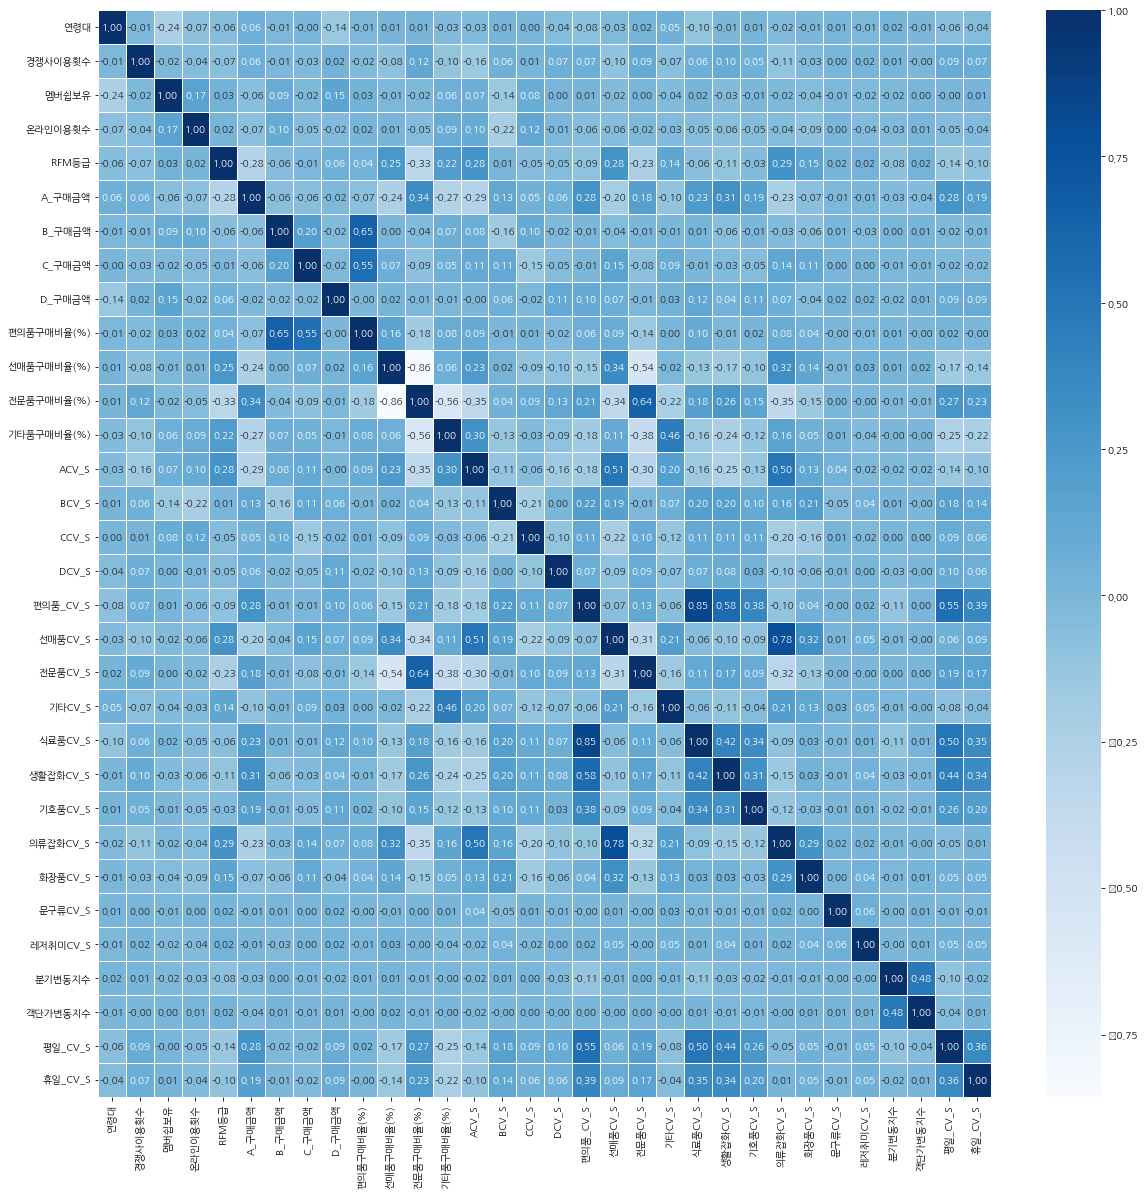

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
dff=X_test
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(20,20))
sns.heatmap(data =dff.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [21]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [20]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
        
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [17]:
X_test.columns

Index(['연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급', 'A_구매금액', 'B_구매금액',
       'C_구매금액', 'D_구매금액', '기_구매금액', '선_구매금액', '전_구매금액', '편_구매금액', 'ACV_S',
       'BCV_S', 'CCV_S', 'DCV_S', '편의품_CV_S', '선매품CV_S', '전문품CV_S', '기타CV_S',
       '식료품CV_S', '생활잡화CV_S', '기호품CV_S', '의류잡화CV_S', '화장품CV_S', '문구류CV_S',
       '레저취미CV_S', '분기변동지수', '객단가변동지수', '평일_CV_S', '휴일_CV_S'],
      dtype='object')

In [18]:
# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
X_fe = X_test[['연령대']]
X_fa= X_test[['분기변동지수','A_구매금액', 'B_구매금액','선_구매금액', '편_구매금액', '전_구매금액','ACV_S', 'BCV_S','편의품_CV_S', '선매품CV_S', '전문품CV_S'
              ,'생활잡화CV_S','식료품CV_S','평일_CV_S','휴일_CV_S']]

for i in X_fa.columns:
    new_c = i + '_log'
    X_fe[new_c] = np.log1p(X_fa[i])

X_fe=X_fe.fillna(0)

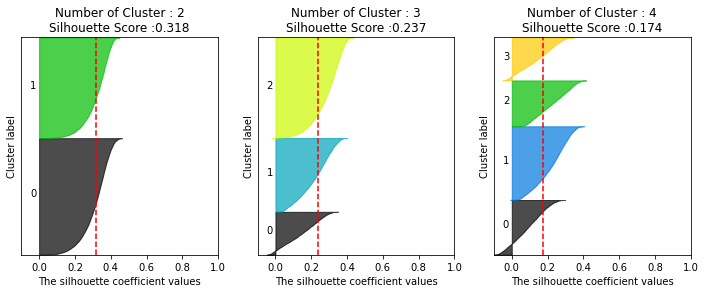

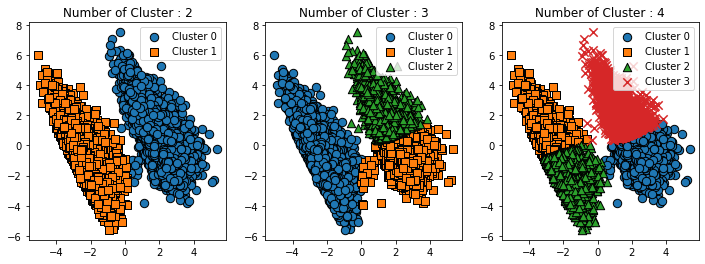

In [23]:
import warnings
warnings.filterwarnings('ignore')
# X_features = X_fa.values
# X_features_scaled = StandardScaler().fit_transform(X_features)

visualize_silhouette([2,3,4],X_fe)
visualize_kmeans_plot_multi([2,3,4],X_fe)

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X_fe)
X_fe['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

In [26]:
X_fe

,연령대,분기변동지수_log,A_구매금액_log,B_구매금액_log,선_구매금액_log,편_구매금액_log,전_구매금액_log,ACV_S_log,BCV_S_log,편의품_CV_S_log,선매품CV_S_log,전문품CV_S_log,생활잡화CV_S_log,식료품CV_S_log,평일_CV_S_log,휴일_CV_S_log,cluster
0,1.998229,0.228020,0.657155,-0.285666,0.704823,0.038631,-0.183421,-2.177551,0.381984,0.187586,-1.561094,0.236939,1.153957,-0.047014,-0.239323,-0.135990,0
1,1.998229,-0.071600,0.801989,-0.321395,0.769330,0.309730,-0.124033,-2.534126,0.307250,0.121706,-1.803379,0.666972,0.731308,-0.507331,-0.187991,-0.871402,0
2,1.998229,-0.176780,-0.585991,-0.334772,-0.512359,-0.288702,-0.257466,1.102572,1.164123,-0.083328,1.277819,-3.745315,-0.160551,0.300612,0.099758,0.289852,1
3,1.998229,-1.271220,-0.227471,-0.230947,-0.216677,-0.179261,-0.243523,-1.785381,-0.001253,-0.596421,-0.725989,0.895680,-1.505567,-0.174620,-0.550477,0.153322,0
4,1.998229,-2.357997,-0.206190,0.123964,-0.141604,-0.009136,-0.230819,0.000000,-0.958370,-0.172044,0.000000,0.181816,-0.942490,-0.111719,-2.563945,-0.134314,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,-2.144017,-0.122808,-0.512264,-0.266095,-0.511448,-0.278932,-0.257466,-1.337341,-0.311103,0.506878,0.881482,-3.745315,1.030902,0.566284,-0.246455,-1.130359,1
18862,-1.108456,0.397742,-0.575701,0.230017,-0.472960,0.022210,-0.257466,1.102572,-0.277740,0.881668,0.557264,-3.745315,0.021547,0.919565,0.683588,0.011982,1
18863,-1.108456,-1.117920,-0.550615,0.328663,-0.410943,0.039508,-0.257466,0.754730,-1.177977,-0.464641,-0.551781,-3.745315,-0.207202,-0.363241,-0.764640,-0.418535,1
18864,-1.108456,0.000000,0.059943,-0.333518,0.089287,-0.343151,-0.180139,-1.083364,1.164123,1.411411,-0.548112,0.266398,1.017494,1.454735,0.517823,-0.386027,0


In [16]:
import eli5 
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier
X=X_test
y=y_test
#미리 사용할 알고리즘을 fit 해야한다
model = RandomForestClassifier().fit(X, y)

perm = PermutationImportance(model, scoring = "accuracy", random_state = 22).fit(X, y) 
eli5.show_weights(perm, top = 38, feature_names = X.columns.tolist())

Weight,Feature
0.2795 ± 0.0051,분기변동지수
0.0261 ± 0.0023,객단가변동지수
0.0137 ± 0.0009,평일_CV_S
0.0125 ± 0.0006,식료품CV_S
0.0125 ± 0.0015,A_구매금액
0.0081 ± 0.0014,RFM등급
0.0074 ± 0.0010,편의품_CV_S
0.0071 ± 0.0005,휴일_CV_S
0.0067 ± 0.0007,선_구매금액
0.0061 ± 0.0012,편_구매금액
